In [1]:
import pandas as pd

treasury_rates = pd.read_csv("12MonthTreasuryBillRate.csv")

treasury_rates.head()


,Date,Time,Tenor,Rate(%)
0,30-Sep-24,5:30:00 PM,12 Months,6.55
1,27-Sep-24,5:30:00 PM,12 Months,6.56
2,26-Sep-24,5:30:00 PM,12 Months,6.55
3,25-Sep-24,5:30:00 PM,12 Months,6.54
4,24-Sep-24,5:30:00 PM,12 Months,6.55


In [2]:
symbols = ['IPCALAB', 'JIOFIN', 'RBLBANK', 'KALYANKJIL', 'LATENTVIEW', 'MSUMI', 'POWERINDIA', 'REDINGTON']
amount = 1000000
weight = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]

for symbol in symbols:
    data_1 = pd.read_csv(f"./Stock Data/30-06-2022-TO-29-06-2023-{symbol}-ALL-N.csv")
    data_2 = pd.read_csv(f"./Stock Data/30-06-2023-TO-30-06-2024-{symbol}-ALL-N.csv")
    frames = [data_1, data_2]
    merged_data = pd.concat(frames)
    merged_data.columns = merged_data.columns.str.strip()
    stripped_data = pd.DataFrame()
    stripped_data.loc[:, 'Date'] =  merged_data.loc[:, 'Date']
    stripped_data.loc[:, 'Close Price'] =  merged_data.loc[:, 'Close Price']
    stripped_data['Close Price'] = stripped_data['Close Price'].astype(str)
    stripped_data['Close Price'] = stripped_data['Close Price'].str.replace(',', '').astype(float)
    stripped_data.to_csv(f"{symbol}_data.csv", index=False)

C:\Users\D Vaishnav\AppData\Local\Temp\ipykernel_25856\1261050519.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_data = pd.concat(frames)


In [3]:
for symbol in symbols:
    # if(symbol == "IPCALAB" or symbol == "POWERINDIA"):
    #     continue
    file_path = f"{symbol}_data.csv"

    # Load data
    data = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True, dtype='float')

    # Set 'Date' as the index for time series operations
    data.set_index('Date', inplace=True)

    # Ensure the data is sorted by date
    data.sort_index(inplace=True)

    # Calculate Daily Returns
    data['Daily_Return'] = ((data['Close Price'] - data['Close Price'].shift(1)) / data['Close Price'].shift(1)) * 100

    # Calculate Weekly Returns
    weekly_data = data['Close Price'].resample('W').last()  # Last price of each week
    weekly_returns = ((weekly_data - weekly_data.shift(1)) / weekly_data.shift(1)) * 100

    # Calculate Monthly Returns
    monthly_data = data['Close Price'].resample('M').last()  # Last price of each month
    monthly_returns = ((monthly_data - monthly_data.shift(1)) / monthly_data.shift(1)) * 100

    # Combine all returns into a single DataFrame
    # Reindex weekly and monthly returns to align with the daily index for easy comparison
    returns = pd.DataFrame({
        'Daily_Return': data['Daily_Return'],
        'Weekly_Return': weekly_returns.reindex(data.index, method='ffill'),
        'Monthly_Return': monthly_returns.reindex(data.index, method='ffill')
    })

    # Drop rows with NaN values due to shift() operations
    returns.dropna(inplace=True)

    returns.to_csv(f"{symbol}_returns.csv")

C:\Users\D Vaishnav\AppData\Local\Temp\ipykernel_25856\3829861870.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Close Price'].resample('M').last()  # Last price of each month
C:\Users\D Vaishnav\AppData\Local\Temp\ipykernel_25856\3829861870.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Close Price'].resample('M').last()  # Last price of each month
C:\Users\D Vaishnav\AppData\Local\Temp\ipykernel_25856\3829861870.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Close Price'].resample('M').last()  # Last price of each month
C:\Users\D Vaishnav\AppData\Local\Temp\ipykernel_25856\3829861870.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Close Price'].resample('M').las

         Date  Daily_Return  Weekly_Return  Monthly_Return
0  2022-08-01     -0.254936       1.316789       11.448468
1  2022-08-02     -0.766764       1.316789       11.448468
2  2022-08-03     -1.222160       1.316789       11.448468
3  2022-08-04      4.805972       1.316789       11.448468
4  2022-08-05     -1.219572       1.316789       11.448468


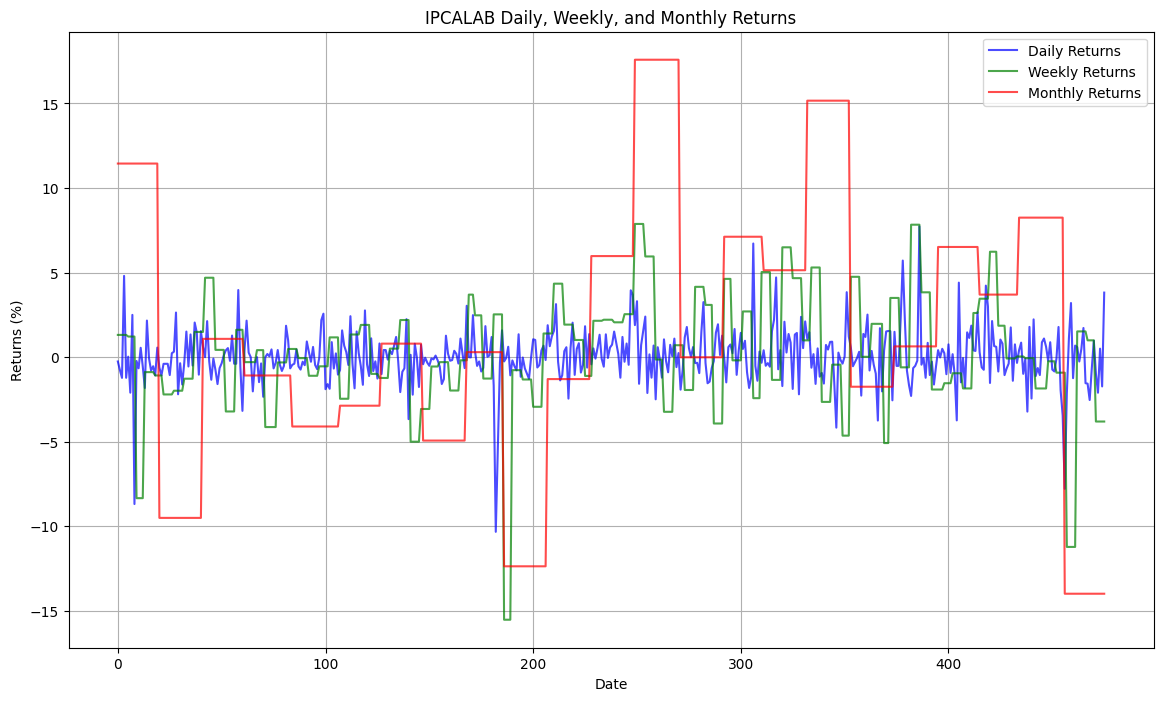

         Date  Daily_Return  Weekly_Return  Monthly_Return
0  2023-10-03      0.086505       1.492537       -0.985011
1  2023-10-04     -2.917027       1.492537       -0.985011
2  2023-10-05      0.333853       1.492537       -0.985011
3  2023-10-06     -0.133097       1.492537       -0.985011
4  2023-10-09     -2.421146      -2.638408       -0.985011


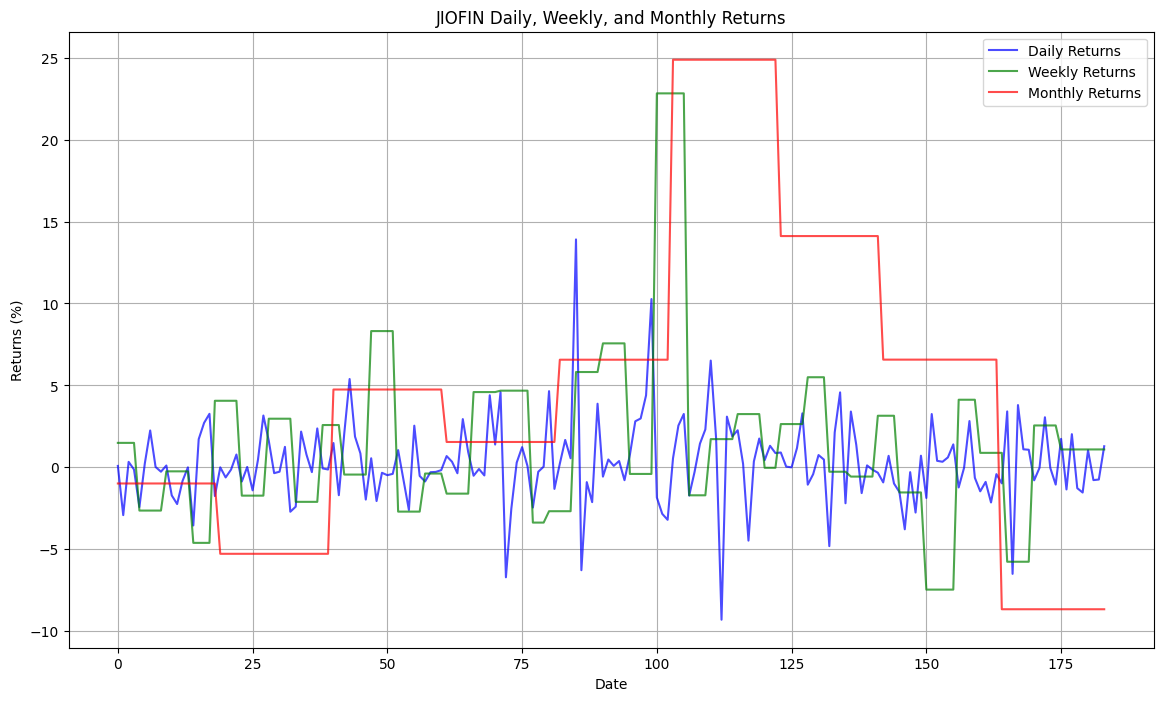

         Date  Daily_Return  Weekly_Return  Monthly_Return
0  2022-08-01      4.227642        0.05423       10.545237
1  2022-08-02      2.808112        0.05423       10.545237
2  2022-08-03     -2.427921        0.05423       10.545237
3  2022-08-04     -0.259202        0.05423       10.545237
4  2022-08-05      0.207900        0.05423       10.545237


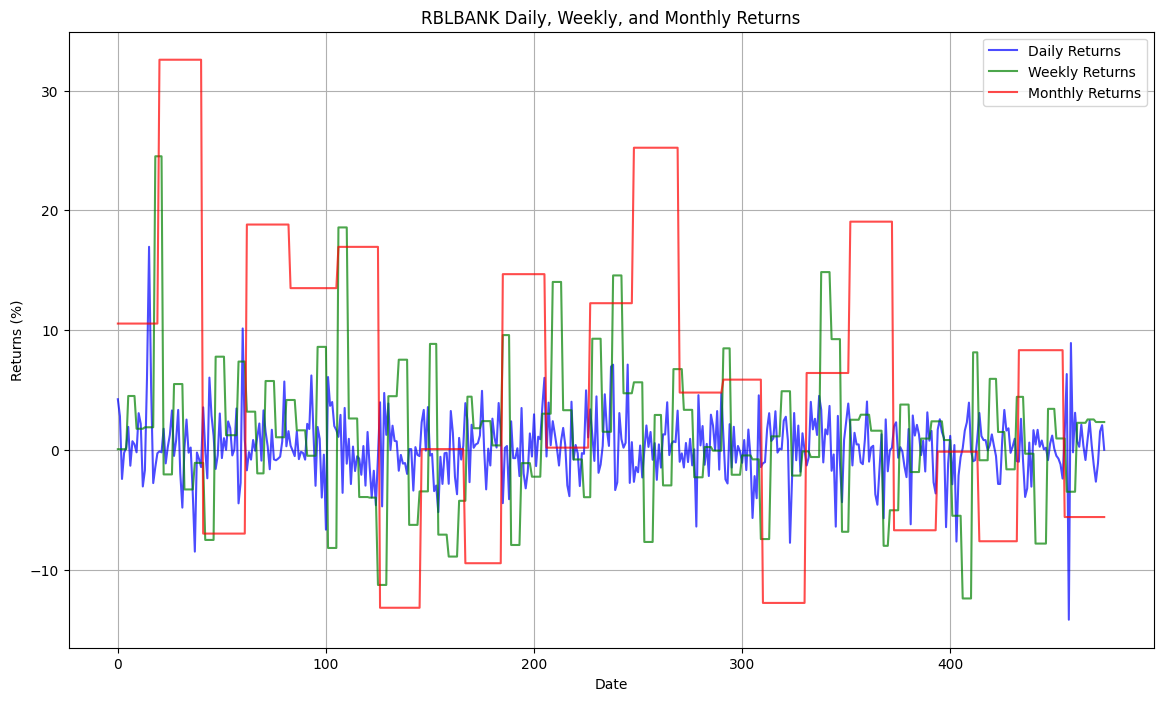

         Date  Daily_Return  Weekly_Return  Monthly_Return
0  2022-08-01      0.845503       0.308404        8.597663
1  2022-08-02      0.533537       0.308404        8.597663
2  2022-08-03      0.833965       0.308404        8.597663
3  2022-08-04      5.714286       0.308404        8.597663
4  2022-08-05      1.280228       0.308404        8.597663


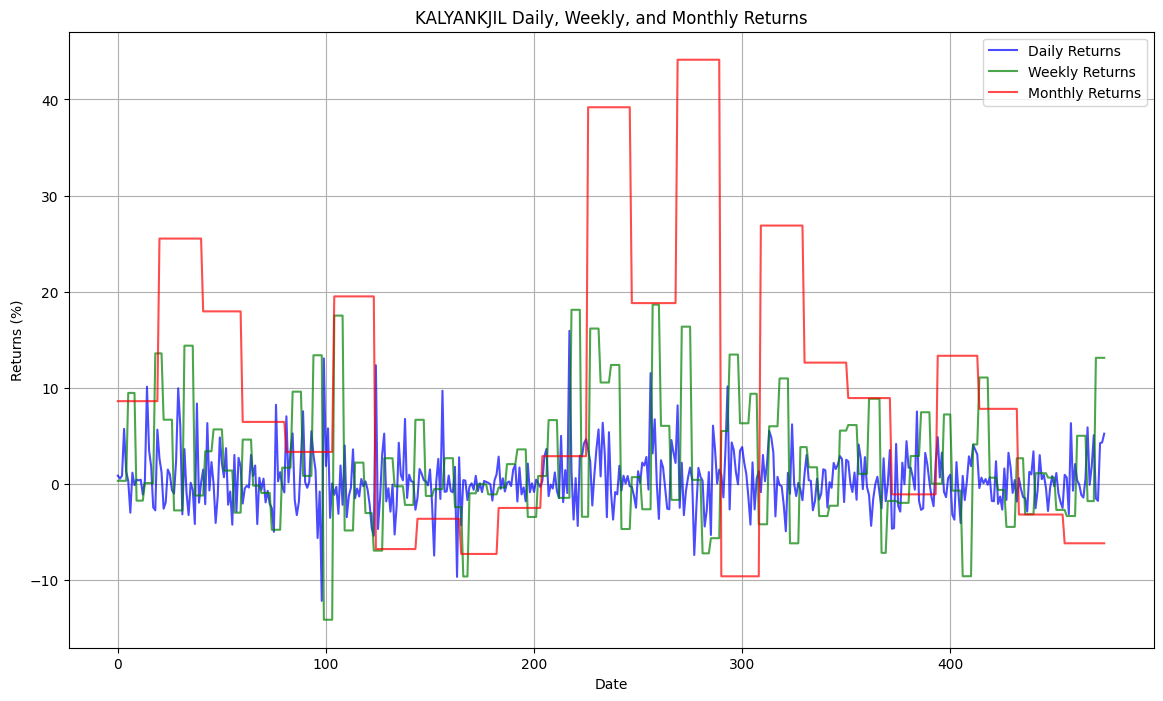

         Date  Daily_Return  Weekly_Return  Monthly_Return
0  2022-08-01     -0.282258      -0.013439       11.393921
1  2022-08-02      0.620030      -0.013439       11.393921
2  2022-08-03     -1.178835      -0.013439       11.393921
3  2022-08-04      0.081334      -0.013439       11.393921
4  2022-08-05      0.270893      -0.013439       11.393921


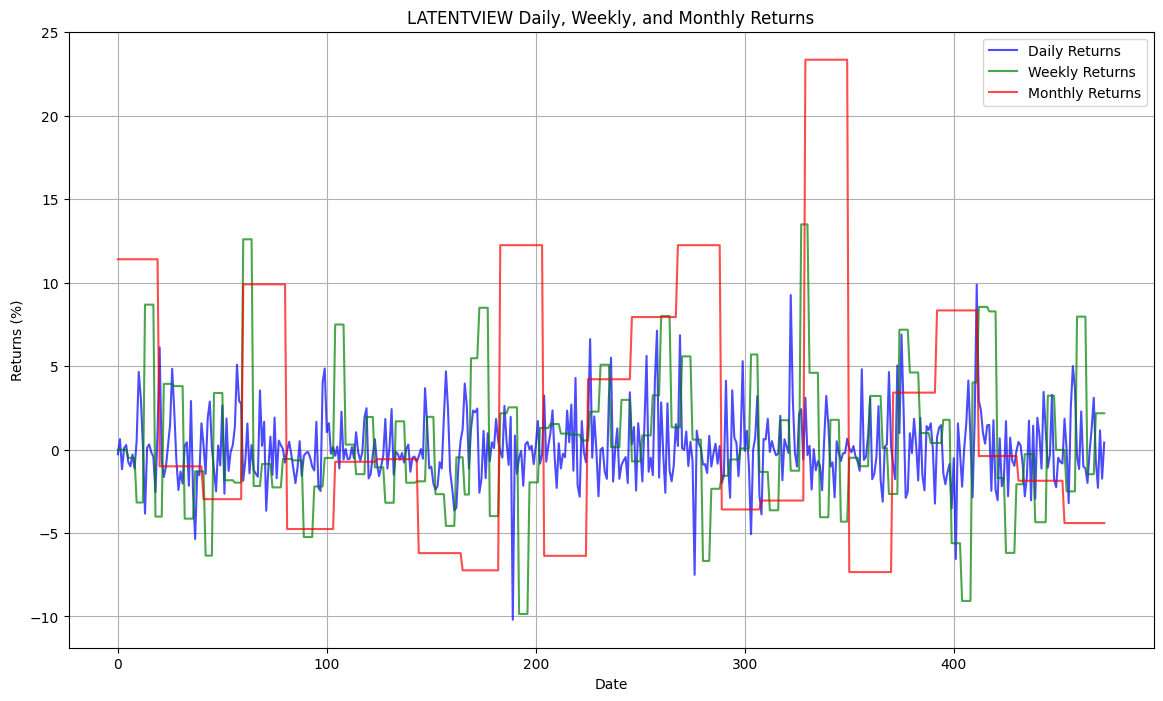

         Date  Daily_Return  Weekly_Return  Monthly_Return
0  2022-08-01     -0.194049      -4.094293        9.801136
1  2022-08-02      0.453662      -4.094293        9.801136
2  2022-08-03      0.000000      -4.094293        9.801136
3  2022-08-04      2.516129      -4.094293        9.801136
4  2022-08-05      0.000000      -4.094293        9.801136


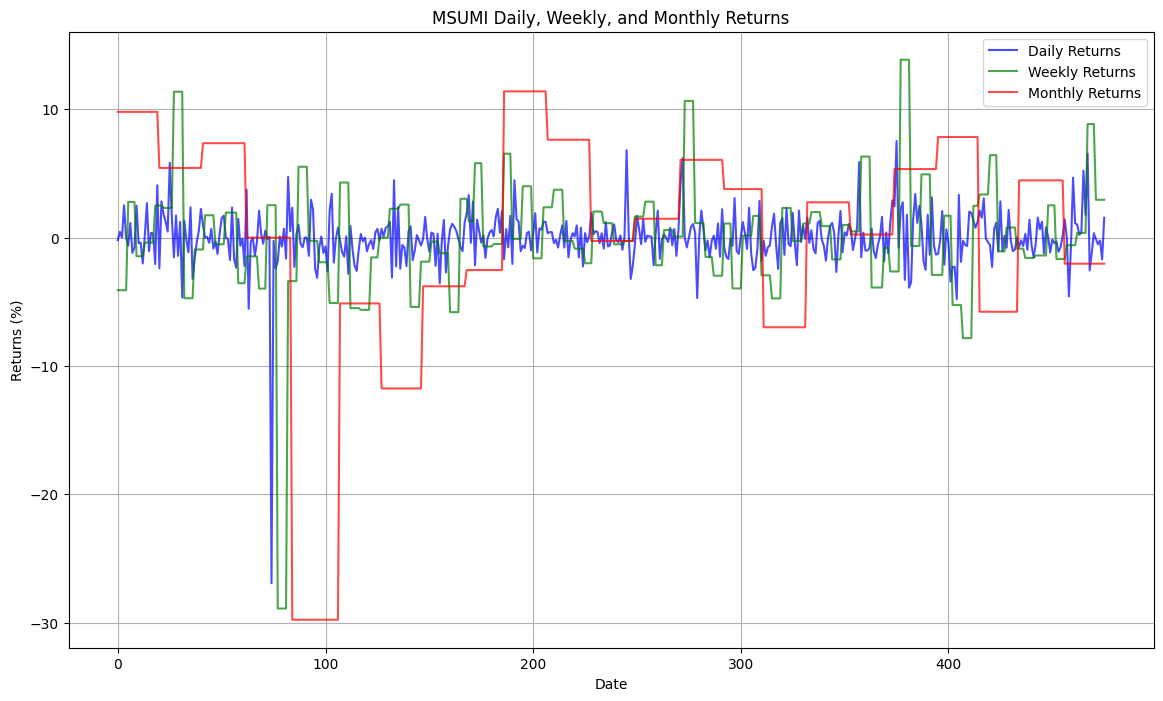

         Date  Daily_Return  Weekly_Return  Monthly_Return
0  2022-08-01      2.641656       1.736484        2.333661
1  2022-08-02      3.991904       1.736484        2.333661
2  2022-08-03     -3.472666       1.736484        2.333661
3  2022-08-04      3.651766       1.736484        2.333661
4  2022-08-05      2.366160       1.736484        2.333661


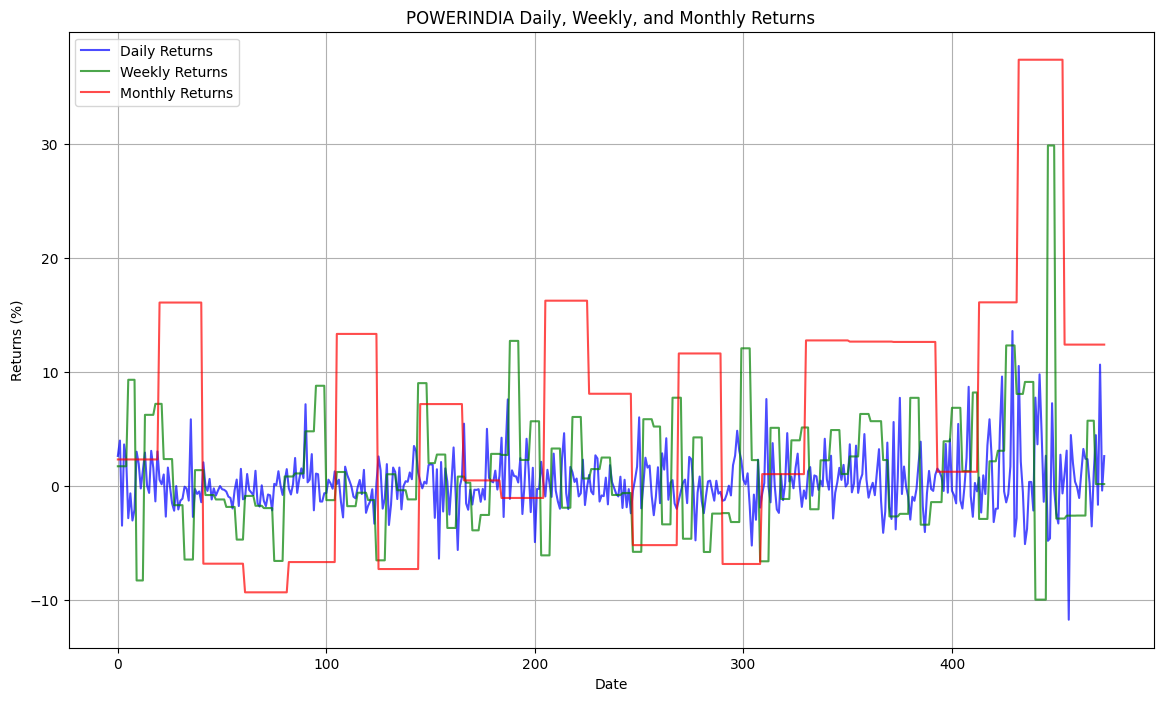

         Date  Daily_Return  Weekly_Return  Monthly_Return
0  2022-08-01      3.489771       3.443983       -0.716846
1  2022-08-02      0.542636       3.443983       -0.716846
2  2022-08-03     -1.387818       3.443983       -0.716846
3  2022-08-04      9.108679       3.443983       -0.716846
4  2022-08-05      3.762092       3.443983       -0.716846


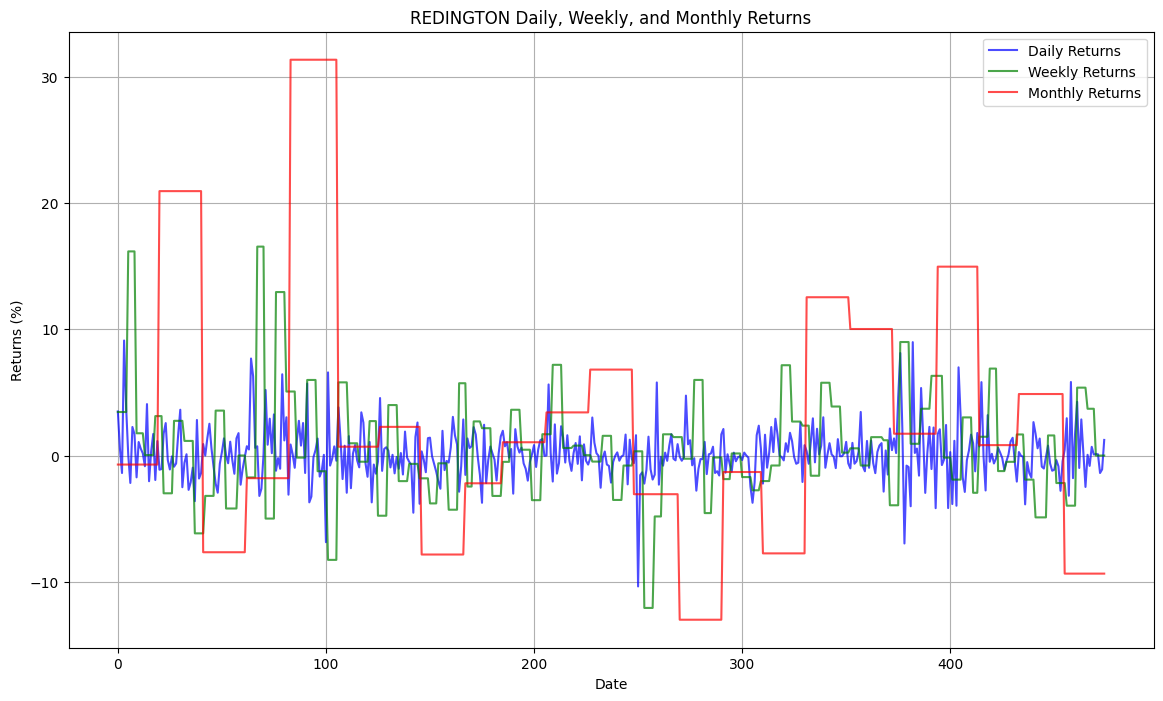

In [4]:
import matplotlib.pyplot as plt

for symbol in symbols:
    returns = pd.read_csv(f"{symbol}_returns.csv")
    print(returns.head())
    plt.figure(figsize=(14, 8))

    plt.plot(returns.index, returns['Daily_Return'], label='Daily Returns', color='blue', alpha=0.7)
    plt.plot(returns.index, returns['Weekly_Return'], label='Weekly Returns', color='green', alpha=0.7)
    plt.plot(returns.index, returns['Monthly_Return'], label='Monthly Returns', color='red', alpha=0.7)

    plt.title(f'{symbol} Daily, Weekly, and Monthly Returns')
    plt.xlabel('Date')
    plt.ylabel('Returns (%)')
    plt.legend()

    plt.grid(True)
    plt.show()

In [5]:
data_nifty_1 = pd.read_csv('./Stock Data/NIFTY 50-30-06-2022-to-29-06-2023.csv')
data_nifty_2 = pd.read_csv('./Stock Data/NIFTY 50-30-06-2023-to-30-06-2024.csv')

frames_1 = [data_nifty_1 , data_nifty_2]
merged_nifty = pd.concat(frames_1)
merged_nifty.columns = merged_nifty.columns.str.strip()
merged_nifty.to_csv("merged_nifty.csv")
merged_nifty.head()



,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,30-JUN-2022,15774.50,15890.00,15728.85,15780.25,306027777.0,23970.65
1,01-JUL-2022,15703.70,15793.95,15511.05,15752.05,364090131.0,25891.94
2,04-JUL-2022,15710.50,15852.35,15661.80,15835.35,304328467.0,19875.22
3,05-JUL-2022,15909.15,16025.75,15785.45,15810.85,254164463.0,19129.60
4,06-JUL-2022,15818.20,16011.35,15800.90,15989.80,288375300.0,22836.77


In [6]:
merged_nifty.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (₹ Cr)'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt

# Verify that the column names are stripped
print(merged_nifty.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (₹ Cr)'],
      dtype='object')


In [8]:
file_path = "merged_nifty.csv"

# Load data
data = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)

# Set 'Date' as the index for time series operations
data.set_index('Date', inplace=True)

# Ensure the data is sorted by date
data.sort_index(inplace=True)

# Calculate Daily Returns
data['Daily_Return'] = ((data['Close'] - data['Close'].shift(1)) / data['Close'].shift(1)) * 100

# Calculate Weekly Returns
weekly_data = data['Close'].resample('W').last()  # Last price of each week
weekly_returns = ((weekly_data - weekly_data.shift(1)) / weekly_data.shift(1)) * 100

# Calculate Monthly Returns
monthly_data = data['Close'].resample('M').last()  # Last price of each month
monthly_returns = ((monthly_data - monthly_data.shift(1)) / monthly_data.shift(1)) * 100

# Combine all returns into a single DataFrame
# Reindex weekly and monthly returns to align with the daily index for easy comparison
nifty_returns = pd.DataFrame({
    'Daily_Return': data['Daily_Return'],
    'Weekly_Return': weekly_returns.reindex(data.index, method='ffill'),
    'Monthly_Return': monthly_returns.reindex(data.index, method='ffill')
})

# Drop rows with NaN values due to shift() operations
nifty_returns.dropna(inplace=True)

nifty_returns.to_csv("nifty_returns.csv")

C:\Users\D Vaishnav\AppData\Local\Temp\ipykernel_25856\2420026646.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)
C:\Users\D Vaishnav\AppData\Local\Temp\ipykernel_25856\2420026646.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Close'].resample('M').last()  # Last price of each month


         Date  Daily_Return  Weekly_Return  Monthly_Return
0  2022-08-01      1.059549       2.624488        8.732435
1  2022-08-02      0.031142       2.624488        8.732435
2  2022-08-03      0.246174       2.624488        8.732435
3  2022-08-04     -0.035369       2.624488        8.732435
4  2022-08-05      0.089173       2.624488        8.732435


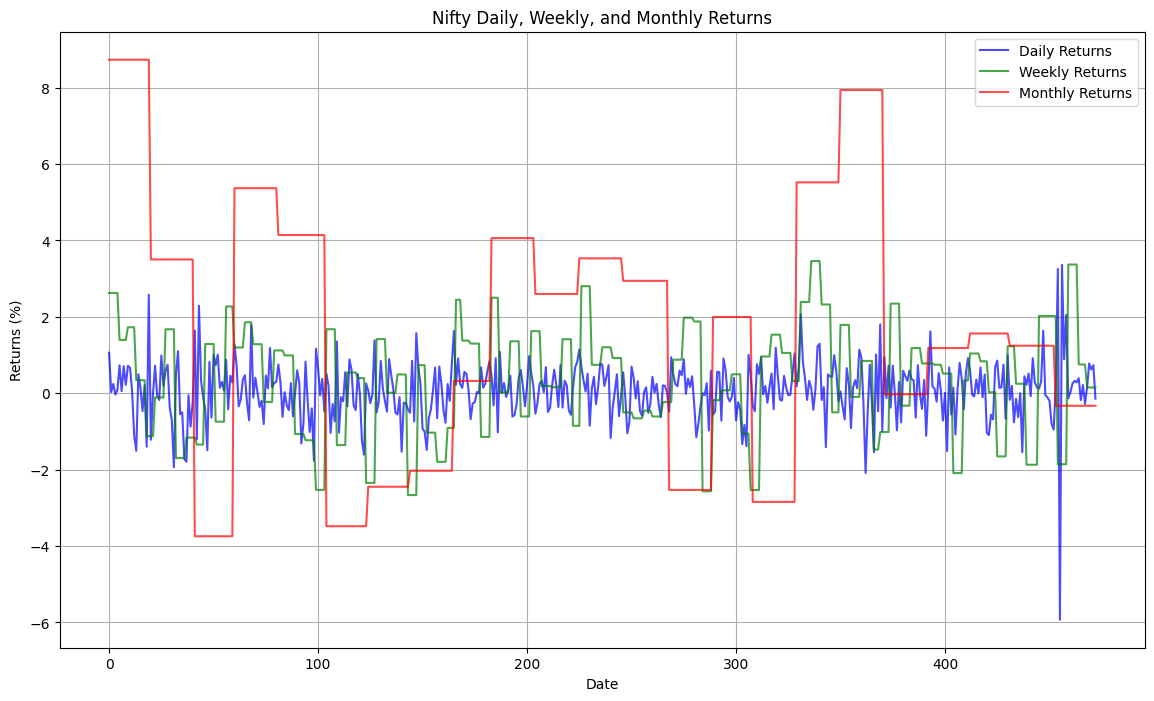

In [9]:
returns = pd.read_csv("nifty_returns.csv")
print(returns.head())
plt.figure(figsize=(14, 8))

plt.plot(returns.index, returns['Daily_Return'], label='Daily Returns', color='blue', alpha=0.7)
plt.plot(returns.index, returns['Weekly_Return'], label='Weekly Returns', color='green', alpha=0.7)
plt.plot(returns.index, returns['Monthly_Return'], label='Monthly Returns', color='red', alpha=0.7)

plt.title(f'Nifty Daily, Weekly, and Monthly Returns')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.legend()

plt.grid(True)
plt.show()

C:\Users\D Vaishnav\AppData\Local\Temp\ipykernel_25856\867929931.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
C:\Users\D Vaishnav\AppData\Local\Temp\ipykernel_25856\867929931.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
C:\Users\D Vaishnav\AppData\Local\Temp\ipykernel_25856\867929931.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)


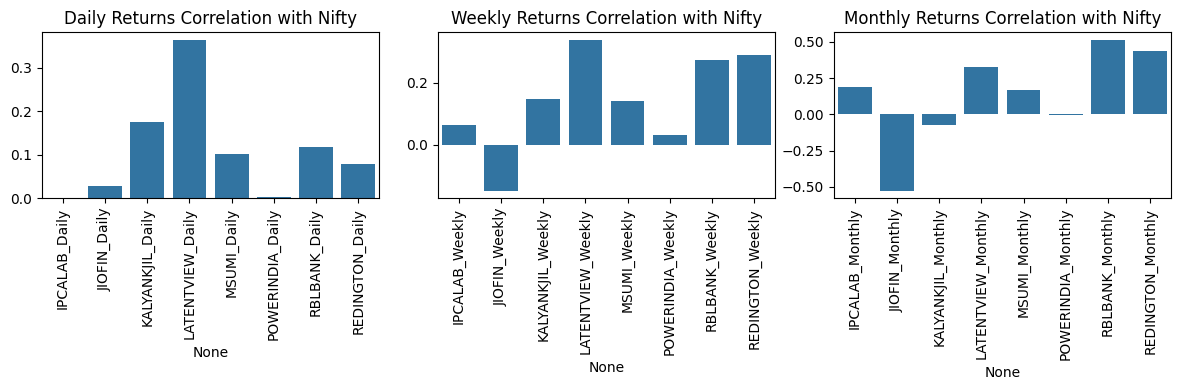

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load all the CSV files into a single DataFrame
df = pd.DataFrame()
for file in ['IPCALAB_returns.csv', 'JIOFIN_returns.csv', 'KALYANKJIL_returns.csv', 'LATENTVIEW_returns.csv', 'MSUMI_returns.csv', 'POWERINDIA_returns.csv', 'RBLBANK_returns.csv', 'REDINGTON_returns.csv', 'nifty_returns.csv']:
    company_name = file.split('_')[0]
    temp_df = pd.read_csv(file)
    df[f"{company_name}_Daily"] = temp_df['Daily_Return']
    df[f"{company_name}_Weekly"] = temp_df['Weekly_Return']
    df[f"{company_name}_Monthly"] = temp_df['Monthly_Return']
    if 'nifty_returns' in file:
        df['nifty_Daily'] = temp_df['Daily_Return']
        df['nifty_Weekly'] = temp_df['Weekly_Return']
        df['nifty_Monthly'] = temp_df['Monthly_Return']

# Calculate the correlations with Nifty
daily_corr = df[[col for col in df.columns if '_Daily' in col and 'nifty' not in col]].corrwith(df['nifty_Daily'])
weekly_corr = df[[col for col in df.columns if '_Weekly' in col and 'nifty' not in col]].corrwith(df['nifty_Weekly'])
monthly_corr = df[[col for col in df.columns if '_Monthly' in col and 'nifty' not in col]].corrwith(df['nifty_Monthly'])

# Create heatmaps
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.barplot(x=daily_corr.index, y=daily_corr.values, ax=axes[0])
axes[0].set_title('Daily Returns Correlation with Nifty')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

sns.barplot(x=weekly_corr.index, y=weekly_corr.values, ax=axes[1])
axes[1].set_title('Weekly Returns Correlation with Nifty')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

sns.barplot(x=monthly_corr.index, y=monthly_corr.values, ax=axes[2])
axes[2].set_title('Monthly Returns Correlation with Nifty')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()